In [1]:
# 1. Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

In [3]:
# Creating a DataFrame
# 2. Load the Dataset
data = pd.read_csv('../data/01-modified-data/combined_data_pca.csv')  # Replace 'your_dataset.csv' with your file path

df = pd.DataFrame(data)

# Computing the distribution of class labels
class_label_distribution = df['DX'].value_counts(normalize=True)

# Printing the distribution
print(class_label_distribution)

0.0    0.719472
1.0    0.234323
2.0    0.046205
Name: DX, dtype: float64


        PC1       PC2   DX
0 -1.526932 -0.075691  2.0
1 -1.909297  0.361647  0.0
2 -1.968267  0.623517  2.0
3 -1.996508  0.265812  0.0
4 -1.452855  0.169047  1.0
Model Accuracy: 0.8032786885245902
Precision: 0.6190058479532163
Recall: 0.6672364672364672


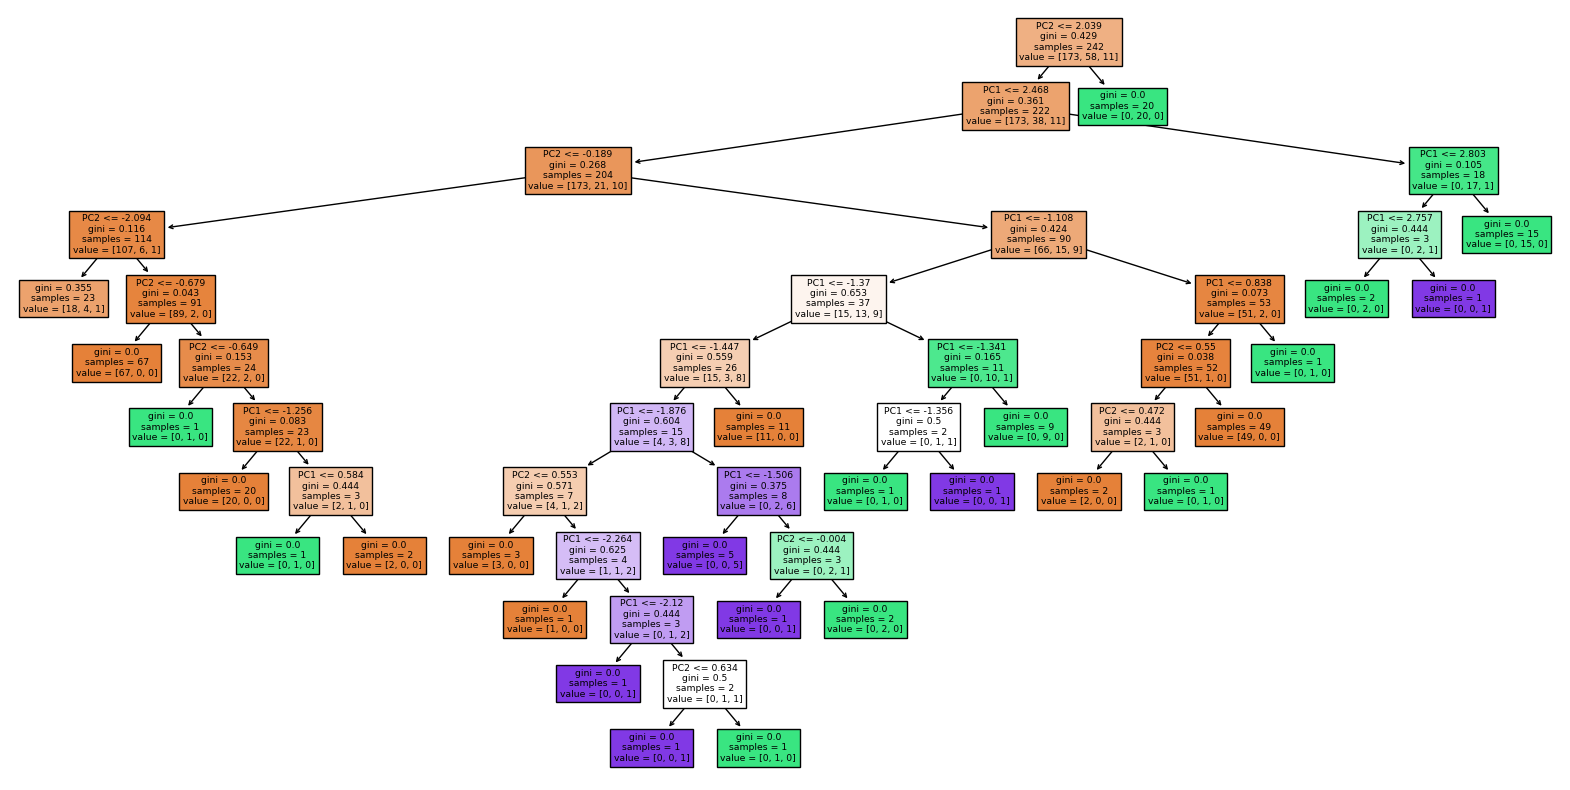

In [7]:



# 3. Explore the Data
print(data.head())  # This shows the first few rows of the dataset

# 4. Prepare the Data
X = data.drop('DX', axis=1)  # Replace 'target_column' with the name of your target column
y = data['DX']  # This is what we want to predict

# 5. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # 80% training and 20% testing

# 6. Create and Train the Decision Tree Model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 7. Make Predictions and Evaluate the Model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")

# Calculate precision and recall
precision = precision_score(y_test, predictions, average='macro') # For multiclass, use 'macro' or 'weighted'
recall = recall_score(y_test, predictions, average='macro')

# Print precision and recall
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# 8. Visualize the Decision Tree (Optional)
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=X.columns)
plt.show()

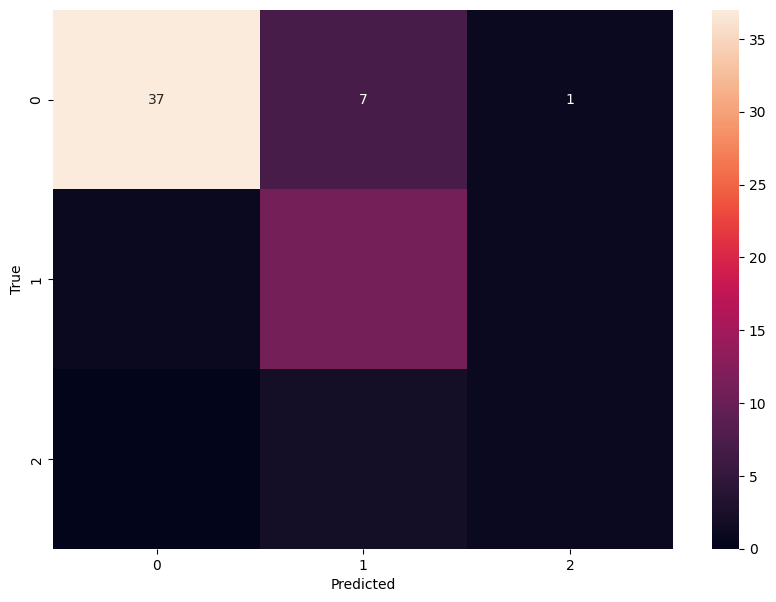

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the responses for the test dataset
#y_pred = clf.predict(X_test)

# Creating the confusion matrix
cm = confusion_matrix(y_test, predictions)


# Using seaborn to create a more informative confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [9]:
import pandas as pd
data = pd.read_csv('../data/01-modified-data/combined_data_pca.csv')


In [12]:
from sklearn.model_selection import train_test_split

X = data.drop('DX', axis=1)  # replace 'target_column' with the name of your target column
y = data['DX']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # 80% training, 20% testing

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [14]:
predictions = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.8524590163934426


In [15]:
import joblib
joblib.dump(model, 'random_forest_model.pkl')  # save
model = joblib.load('random_forest_model.pkl')  # load

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score


# 4. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 5. Create and Train the XGBoost Model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 6. Make Predictions and Evaluate the Model
predictions = model.predict(X_test)
print(predictions)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")

# 7. Parameter Tuning (Optional)
# model = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
# model.fit(X_train, y_train)
# Adjust n_estimators, max_depth, and learning_rate as needed

[0 0 0 0 0 0 1 0 0 1 1 0 0 0 2 0 0 0 0 0 0 1 0 1 0 0 1 0 2 0 0 0 2 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 2]
Model Accuracy: 0.8524590163934426
